# Importing **Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/YBI PROJECT/archive (2)/german_credit_data.csv')
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


# **Clean the imported data of irrelevant data columns.**

In [3]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


# **Split into train and test dataset**

In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 0)
# df_train.reset_index()
df_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
687,30,male,2,free,moderate,moderate,2862,36,car,good
500,27,female,2,own,little,little,3123,24,car,bad
332,24,female,3,own,moderate,moderate,7408,60,car,bad
979,25,male,2,rent,moderate,moderate,1264,15,car,bad
817,24,female,2,rent,little,NaN,1554,6,radio/TV,good
...,...,...,...,...,...,...,...,...,...,...
835,48,male,2,own,little,little,1082,12,car,bad
192,36,male,2,own,little,moderate,3915,27,business,bad
629,64,male,1,own,NaN,NaN,3832,9,education,good
559,31,male,1,own,little,moderate,1928,18,furniture/equipment,bad


In [7]:
df_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
859,26,male,2,rent,moderate,NaN,3577,9,car,good
298,43,male,2,own,little,NaN,2515,18,furniture/equipment,good
553,27,male,2,own,moderate,moderate,1995,12,car,good
672,42,male,3,own,little,NaN,10366,60,car,good
...,...,...,...,...,...,...,...,...,...,...
679,26,female,2,own,little,NaN,1453,18,radio/TV,good
722,24,female,1,own,little,little,1228,12,car,bad
215,39,female,1,own,NaN,moderate,932,6,education,good
653,42,male,3,own,moderate,moderate,8086,36,car,bad


In [8]:
df_test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
859,26,male,2,rent,moderate,NaN,3577,9,car,good
298,43,male,2,own,little,NaN,2515,18,furniture/equipment,good
553,27,male,2,own,moderate,moderate,1995,12,car,good
672,42,male,3,own,little,NaN,10366,60,car,good


**Filling empty values with Unknown variable so that no information is lost.**

In [9]:
df_train = df_train.fillna('Unknown')
df_test = df_test.fillna('Unknown')

# **Seperating categorical columns from the data and then ordinally encode them back into the train and test data set.**

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:

OH_encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
OH_cols = ['Sex','Housing','Purpose']
OH_train= pd.DataFrame(OH_encoder.fit_transform(df_train[OH_cols]))
OH_test= pd.DataFrame(OH_encoder.transform(df_test[OH_cols]))

In [12]:
OH_train.index = df_train.index
OH_test.index = df_test.index
df_train=df_train.drop(OH_cols,axis=1)
df_test=df_test.drop(OH_cols,axis=1)

In [13]:
df_train.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
687,30,2,moderate,moderate,2862,36,good
500,27,2,little,little,3123,24,bad
332,24,3,moderate,moderate,7408,60,bad
979,25,2,moderate,moderate,1264,15,bad
817,24,2,little,Unknown,1554,6,good


In [14]:
df_test.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
993,30,3,little,little,3959,36,good
859,26,2,moderate,Unknown,3577,9,good
298,43,2,little,Unknown,2515,18,good
553,27,2,moderate,moderate,1995,12,good
672,42,3,little,Unknown,10366,60,good


In [15]:
df_train = pd.concat([OH_train,df_train], axis=1)
df_test = pd.concat([OH_test,df_test],axis =1)

In [16]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
687,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30,2,moderate,moderate,2862,36,good
500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,little,little,3123,24,bad
332,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24,3,moderate,moderate,7408,60,bad
979,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,2,moderate,moderate,1264,15,bad
817,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24,2,little,Unknown,1554,6,good


In [17]:
#Encoding based on comparison to prevent bias due to weights and unfair encoding.

df_train['Saving accounts']=df_train['Saving accounts'].replace({'Unknown':0, 'little':1, 'moderate':2, 'rich':3, 'quite rich':4})
df_test['Saving accounts']=df_test['Saving accounts'].replace({'Unknown':0, 'little':1, 'moderate':2, 'rich':3, 'quite rich':4})
df_train['Checking account']=df_train['Checking account'].replace({'Unknown':0, 'little':1, 'moderate':2, 'rich':3})
df_test['Checking account']=df_test['Checking account'].replace({'Unknown':0, 'little':1, 'moderate':2, 'rich':3})

In [18]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
687,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30,2,2,2,2862,36,good
500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,1,1,3123,24,bad
332,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24,3,2,2,7408,60,bad
979,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,2,2,2,1264,15,bad
817,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24,2,1,0,1554,6,good


In [19]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
993,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30,3,1,1,3959,36,good
859,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,2,2,0,3577,9,good
298,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43,2,1,0,2515,18,good
553,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,2,2,1995,12,good
672,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,42,3,1,0,10366,60,good


In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_train[['Risk']] = ordinal_encoder.fit_transform(df_train[['Risk']])
df_test[['Risk']] = ordinal_encoder.transform(df_test[['Risk']])
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk
687,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30,2,2,2,2862,36,1.0
500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,1,1,3123,24,0.0
332,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24,3,2,2,7408,60,0.0
979,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,2,2,2,1264,15,0.0
817,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24,2,1,0,1554,6,1.0


# **Splitting into independent and dependent variables and scaling the values in each column by using standard scaler.**

In [21]:
X_train = df_train.loc[:,df_train.columns!='Risk']
y_train = df_train.Risk
X_test = df_test.loc[:,df_test.columns!='Risk']
y_test = df_test.Risk
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# **Logistic Regression Model**

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_predict = lr.predict(X_test)

# **Overall metrics of the predicted score using confusion matrix, accuracy score anf ROC AUC score.**

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [27]:
confusion_matrix(y_test,y_predict)

array([[ 16,  42],
       [ 13, 129]])

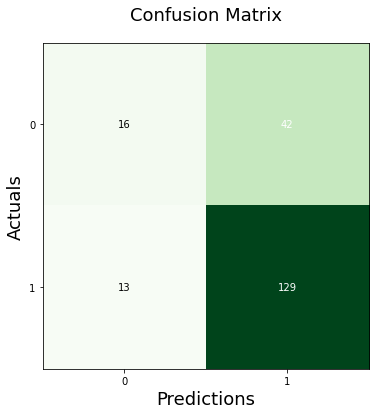

In [28]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_predict), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
accuracy_score(y_test,y_predict)

0.725

In [30]:
roc_auc_score(y_test,y_predict)

0.5921563865954347

In [31]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.55      0.28      0.37        58
         1.0       0.75      0.91      0.82       142

    accuracy                           0.73       200
   macro avg       0.65      0.59      0.60       200
weighted avg       0.70      0.72      0.69       200



In [32]:
df = pd.concat([df_train,df_test],axis=0)
y = df.Risk
X = df.drop(['Risk'],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Age,Job,Saving accounts,Checking account,Credit amount,Duration
687,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30,2,2,2,2862,36
500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,1,1,3123,24
332,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24,3,2,2,7408,60
979,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,2,2,2,1264,15
817,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24,2,1,0,1554,6


# **Implementing cross validation**

In [33]:
from sklearn.model_selection import cross_val_predict
model = LogisticRegression()
predicted = cross_val_predict(model, X, y, cv = 5, verbose = 0)
score = accuracy_score(y, predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

In [34]:
print(score)

0.704


# **Using Decision tree classifier model**

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test) 

In [36]:
confusion_matrix(y_test, predictions)

array([[ 31,  27],
       [ 39, 103]])

In [37]:
accuracy_score(y_test, predictions)

0.67

In [38]:
df = pd.concat([df_train,df_test],axis=0)
y = df.Risk
X = df.drop(['Risk'],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Age,Job,Saving accounts,Checking account,Credit amount,Duration
687,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30,2,2,2,2862,36
500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,1,1,3123,24
332,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24,3,2,2,7408,60
979,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,2,2,2,1264,15
817,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24,2,1,0,1554,6


# **Using Random Forest Classifier Model.**

In [57]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 20, 50, 100, 200, 500]
scores={}
for n_estimator in n_estimators:
  rf = RandomForestClassifier(n_estimator, random_state=1)
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)

  score = accuracy_score(y_test, rf_pred)
  scores[n_estimator]=score

print(scores)

{10: 0.72, 20: 0.735, 50: 0.765, 100: 0.755, 200: 0.745, 500: 0.755}


In [59]:
n_estimator_max_acc = 50
rf = RandomForestClassifier(n_estimator_max_acc, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

score = accuracy_score(y_test, rf_pred)

In [60]:
confusion_matrix(y_test, rf_pred)

array([[ 27,  31],
       [ 16, 126]])

In [61]:
accuracy_score(y_test, rf_pred)

0.765

# **Using ANN for predictions.**

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

ann_model = Sequential([Dense(20, input_dim = 19, activation = 'relu'),
                        Dropout(rate=0.5),
                        BatchNormalization(),
                        Dense(10, activation = 'relu'),
                        BatchNormalization(),
                        Dense(5, activation = 'relu'),
                        BatchNormalization(),
                        Dense(1, activation = 'softmax')])

In [50]:
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 15)

In [52]:
ann_model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 2s 5ms/step - loss: 0.8634 - accuracy: 0.6975
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7839 - accuracy: 0.6975
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.7515 - accuracy: 0.6975
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.7389 - accuracy: 0.6975
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.7161 - accuracy: 0.6975
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6994 - accuracy: 0.6975
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6619 - accuracy: 0.6975
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6975
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6975
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6975
Epoch 11/50
25/25 [

In [53]:
ann_preds = ann_model.predict(X_test)

In [55]:
accuracy_score(y_test, ann_preds)

0.71

# **The best accuracy is given by RANDOM FOREST CLASSIFIER MODEL of 0.765 and hence can be chosen as the final model for our credit risk detection.**